In [1]:
# Google - Stock market abbreviation: GOOGL
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='your_API_key_here',output_format='pandas')

In [2]:
# Use the Alpha Vantage API to get Google stock data
GOOGL_data, metadata=ts.get_daily('GOOGL',outputsize='full')
GOOGL_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,4023.000000,4023.000000,4023.000000,4023.000000,4.023000e+03
mean,689.100503,695.651066,682.090376,689.019399,6.928816e+06
std,309.085200,311.495395,306.683079,309.339401,7.908219e+06
min,99.090000,101.740000,95.960000,100.010000,3.845900e+04
25%,480.860300,485.640000,476.910000,481.045000,1.848588e+06
50%,596.890000,600.370000,592.170000,596.330000,4.199900e+06
75%,882.180000,888.032500,875.905000,881.260000,8.743200e+06
max,1585.030000,1587.050000,1552.620000,1564.850000,8.215110e+07


In [3]:
# Create a csv file of the data
GOOGL_data.to_csv('GOOGL_data.csv')

In [4]:
# Sort by date
GOOGL_data['date'] = GOOGL_data.index

In [5]:
# Show our data
GOOGL_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-11,1494.00,1510.44,1478.1900,1480.540,1546982.0,2020-08-11
2020-08-10,1490.80,1507.15,1477.4901,1496.820,1027329.0,2020-08-10
2020-08-07,1509.04,1520.09,1486.2700,1498.370,1386294.0,2020-08-07
2020-08-06,1476.15,1506.27,1471.9000,1504.950,1665261.0,2020-08-06
2020-08-05,1476.82,1490.00,1471.2150,1479.090,1457518.0,2020-08-05
...,...,...,...,...,...,...
2004-08-25,104.76,108.00,103.8800,106.000,9188600.0,2004-08-25
2004-08-24,111.24,111.60,103.5700,104.870,15247300.0,2004-08-24
2004-08-23,110.76,113.48,109.0500,109.400,18256100.0,2004-08-23


In [6]:
# Read in our stock market data to use for training
GOOGL_training_complete = pd.read_csv('//project_3/GOOGL_data.csv')

In [7]:
# Filter all the data from our training set and will retain only the values for the open column
# We will use the opening stock price for our testing
GOOGL_training_processed = GOOGL_training_complete.iloc[:, 1:2].values

In [8]:
# Scale the data so we can use a recurrent neural network on it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

GOOGL_training_scaled = scaler.fit_transform(GOOGL_training_processed)

In [9]:
# Create two lists: feature_set and labels
features_set = []
labels = []
for i in range(60, 4023):
    features_set.append(GOOGL_training_scaled[i-60:i, 0])
    labels.append(GOOGL_training_scaled[i, 0])

In [10]:
# Convert both the feature_set and the labels list to the numpy array before we can use it for training
features_set, labels = np.array(features_set), np.array(labels)

In [11]:
# In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM.
# We need to convert our data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [12]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
# Instantiate the sequential class
model = Sequential()

In [14]:
# Add LSTM layer to the model that we just created. LSTM = Long Short-Term Memory, a type of RNN
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
# Add dropout layer to avoid overfitting of the data
model.add(Dropout(0.2))

In [16]:
# Add three more LSTM and dropout layers to our model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [17]:
# To make our model more robust we add a dense layer
model.add(Dense(units = 1))

In [18]:
# Compile the model and set parameters
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Train the model - this can take a while
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3962 samples
Epoch 1/100
3962/3962 [==============================] - 21s 5ms/sample - loss: 0.0108
Epoch 2/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 0.0030
Epoch 3/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 0.0025
Epoch 4/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 0.0023
Epoch 5/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 0.0022
Epoch 6/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 0.0021
Epoch 7/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 0.0019
Epoch 8/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 0.0017
Epoch 9/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 0.0016
Epoch 10/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 0.0014
Epoch 11/100


3962/3962 [==============================] - 20s 5ms/sample - loss: 4.9359e-04
Epoch 88/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 4.8863e-04
Epoch 89/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 4.8573e-04
Epoch 90/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 5.1211e-04
Epoch 91/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 4.5085e-04
Epoch 92/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 4.8870e-04
Epoch 93/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 5.2779e-04
Epoch 94/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 4.7202e-04
Epoch 95/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 5.3245e-04
Epoch 96/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 4.9473e-04
Epoch 97/100
3962/3962 [==============================] - 19s 5ms/sample - loss: 4.7939e-04
E

In [20]:
# Pull in recent stock data to test the prediction model against - last 100 days of data
GOOGL_data2, metadata=ts.get_daily('GOOGL',outputsize='compact')
GOOGL_data2.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,1375.052000,1393.025273,1356.695551,1376.431200,2.151470e+06
std,130.417431,129.465756,134.173509,131.963995,8.766219e+05
min,1056.370000,1066.910000,1008.870000,1054.130000,1.027329e+06
25%,1282.825000,1289.537500,1263.927500,1275.242500,1.553971e+06
50%,1417.405000,1435.620000,1395.275000,1416.175000,1.866306e+06
75%,1479.292500,1494.265000,1465.826250,1479.452500,2.453266e+06
max,1585.030000,1587.050000,1552.620000,1564.850000,5.417888e+06


In [21]:
GOOGL_data2.to_csv('GOOGL_data2.csv')

In [22]:
GOOGL_data2['date'] = GOOGL_data2.index

In [23]:
GOOGL_data2

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-11,1494.00,1510.44,1478.1900,1480.54,1554853.0,2020-08-11
2020-08-10,1490.80,1507.15,1477.4901,1496.82,1027329.0,2020-08-10
2020-08-07,1509.04,1520.09,1486.2700,1498.37,1386294.0,2020-08-07
2020-08-06,1476.15,1506.27,1471.9000,1504.95,1665261.0,2020-08-06
2020-08-05,1476.82,1490.00,1471.2150,1479.09,1457518.0,2020-08-05
...,...,...,...,...,...,...
2020-03-26,1114.72,1171.48,1092.0300,1162.92,3834422.0,2020-03-26
2020-03-25,1124.58,1146.17,1083.0100,1101.62,4516162.0,2020-03-25
2020-03-24,1103.98,1133.33,1086.4300,1130.01,3623435.0,2020-03-24


In [24]:
# Read in our testing data
GOOGL_testing_complete = pd.read_csv('//project_3/GOOGL_data2.csv')
GOOGL_testing_processed = GOOGL_testing_complete.iloc[:, 1:2].values

In [25]:
# Concatenate our training data and testing data
GOOGL_total = pd.concat((GOOGL_training_complete['1. open'], GOOGL_testing_complete['1. open']), axis=0)

In [26]:
# Prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days
# We need opening stock prices for the 20 test days and the 60 stock prices from the last 60 days for the training set
test_inputs = GOOGL_total[len(GOOGL_total) - len(GOOGL_testing_complete) - 60:].values

In [27]:
# Scale the test data
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [33]:
# Prepare our final test input set that will contain previous 60 stock prices
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [34]:
# Convert our data into the three-dimensional format which can be used as input to the LSTM
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [35]:
# Call the predict method on the model that we trained
predictions = model.predict(test_features)

In [36]:
# Since we scaled our data, the predictions made by the LSTM are also scaled 
# We need to reverse the scaled prediction back to their actual values
predictions = scaler.inverse_transform(predictions)

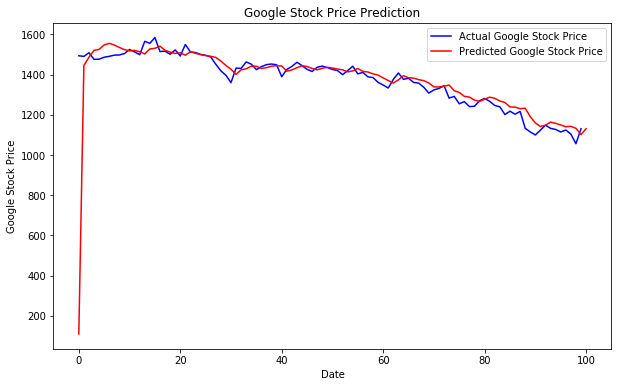

In [37]:
# Plot the results - model trained with 100 epochs 
plt.figure(figsize=(10,6))
plt.plot(GOOGL_testing_processed, color='blue', label='Actual Google Stock Price')
plt.plot(predictions , color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [38]:
# Save the model - can be used later
model.save("Google_model_trained.h5")